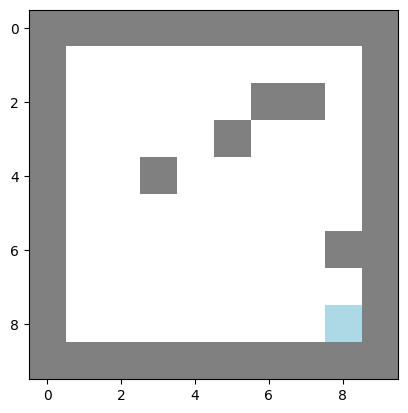

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Matriz maze que es el laberinto original 10x10 con 0 y 1
maze = np.zeros((10,10)).astype(int)
maze[0,:] = 1
maze[-1,:] = 1
maze[:,0] = 1
maze[:,-1] = 1
maze[8,8] = 3

num_walls = 5
for _ in range(num_walls):
    # Obtiene posiciones aleatorias evitando las paredes
    row = np.random.randint(1, 9)
    col = np.random.randint(1, 9)

    # Verifica si la posición ya está ocupada (no es un muro ni un borde y tampoco es 1,1 o 8,8)
    while maze[row, col] != 0 or (row == 1 and col == 1) or (row == 8 and col == 8):
        row = np.random.randint(1, 9)
        col = np.random.randint(1, 9)

    # Coloca el muro en la posición aleatoria
    maze[row, col] = 1

# Método que hace que se vea un mapa para ver mejor el laberinto.
def visualize_example(x):
  cmap = ListedColormap(['white', 'gray', 'orange', 'green',  'lightblue',])
  plt.figure()
  plt.imshow(x, cmap=cmap)
  plt.grid(False)
  plt.show()

visualize_example(maze.T)



In [3]:
#Clase Agente

class Agent:

  x = 1
  y = 1

  #Matriz de movimientos para luego usarse para moverse arriba, abajo, izq y der y las diagonales
  move = np.array([[0,-1],[-1, -1],[1,0],[1, -1],[0,1],[1, 1],[-1,0],[-1, 1]])

  #Constructor que solo declara la posicion inicial de x e y que es donde está el agente y lo pone a 4
  # (para que se vea que ha pasado por ahí).
  def __init__(self, mark):
    self.mark = maze
    self.mark[self.x,self.y] = 4

  #El método clave de movimiento, tiene por parámetro la posición.
  def shift(self,position):
    #Si la posición es mayor o igual a 0 y menor o igual a 7  entonces almacenamos en dos variables la posición actual de x e y.
    #Después, ejecuta el move de position en x e y, y eso da un número que será sumado a las posiciones originales.
    if position >=0 and position <=7 :
      x = self.x
      y = self.y
      x+= self.move[position,0]
      y+= self.move[position,1]
      print('Position:',position, '| XY:', '[',x,',',y,']')
      #Si el mark[x,y]  es 1 entonces se trata de un muro por lo que no puede pasar.
      if(self.mark[x,y] == 1):
        print('This is a wall')
        return None
      #Si es un sitio por el que ya has pasado, pinta el sitio en el que estás y te dice que ya has estado ahí.
      if (self.mark[x,y] == 4):
        self.mark[self.x, self.y] = 4
        print('You already have been here')
        return None
      else:
        #Si en mark[x,y] nos da 3, entonces es que estamos en 8,8 por lo que pinta el sitio en el que estamos antes de moverse.
        #Devuelve la nueva posición x e y.
        if(self.mark[x,y] == 3):
          self.mark[self.x, self.y] = 4
          self.x = x
          self.y = y
          self.mark[self.x, self.y] = 2
          return [self.x,self.y]
        #El sitio en el que estás se pinta, y el Agente pasa a desplazarse a otro sitio devolviendo las nuevas coordenadas.
        self.mark[self.x, self.y] = 4
        self.x = x
        self.y = y
        return [self.x, self.y]
    else:
      print('Error, You need to put values from 0 to 3.')


queue:  [[1, 1]]
visited:  []
Position: 0 | XY: [ 1 , 0 ]
This is a wall
Position: 1 | XY: [ 0 , 0 ]
This is a wall
Position: 2 | XY: [ 2 , 1 ]
Movement:  [2, 1]
Position: 3 | XY: [ 3 , 0 ]
This is a wall
Position: 4 | XY: [ 2 , 2 ]
Movement:  [2, 2]
Position: 5 | XY: [ 3 , 3 ]
Movement:  [3, 3]
Position: 6 | XY: [ 2 , 3 ]
Movement:  [2, 3]
Position: 7 | XY: [ 1 , 4 ]
Movement:  [1, 4]
queue:  [[2, 1], [2, 2], [3, 3], [2, 3], [1, 4]]
visited:  [[1, 1]]
Position: 0 | XY: [ 2 , 0 ]
This is a wall
Position: 1 | XY: [ 1 , 0 ]
This is a wall
Position: 2 | XY: [ 3 , 1 ]
Movement:  [3, 1]
Position: 3 | XY: [ 4 , 0 ]
This is a wall
Position: 4 | XY: [ 3 , 2 ]
Movement:  [3, 2]
Position: 5 | XY: [ 4 , 3 ]
Movement:  [4, 3]
Position: 6 | XY: [ 3 , 3 ]
You already have been here
Position: 7 | XY: [ 3 , 4 ]
This is a wall
queue:  [[2, 2], [3, 3], [2, 3], [1, 4], [3, 1], [3, 2], [4, 3]]
visited:  [[1, 1], [2, 1]]
Position: 0 | XY: [ 2 , 1 ]
You already have been here
Position: 1 | XY: [ 1 , 1 ]
You

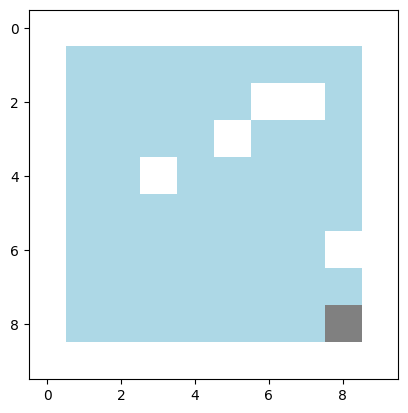

In [4]:

# Arrays de posiciones a la cola y posiciones visitadas.
queue = []
visited = []

#Instancio el objeto agente
a1 = Agent(maze)

#Añado las posiciones iniciales 1,1 a la cola.
queue.append([a1.x,a1.y])
win = False

#Mientras que haya cola y win sea falso...
while queue and win == False :
  print('queue: ', queue)
  actual = queue.pop(0)
  #Actualizamos las posiciones de x e y de agente con las de actual[0] y actual[1]
  a1.x = actual[0]
  a1.y = actual[1]

  if actual not in visited:
    print('visited: ', visited)
    #Añadimos al array de visitados las posiciones x e y de actual si este no está en visitado.
    visited.append(actual)
    for s in range(8):
      #Ejecutamos el metodo movimiento para que siempre haga las 8 direcciones posibles
      movement = a1.shift(s)
      if (movement == [8,8]):
          # Si es 8,8 el movimiento has ganado.
          print('YOU WON')
          win = True
          break
      if movement is not None and movement not in visited:
        print('Movement: ', movement)
        queue.append(movement)

print(a1.mark.T)
visualize_example(a1.mark.T)